# Classification of Images of Geometric Shapes

## 1. Import necessary packages

In [160]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import cv2

from keras.utils import to_categorical, load_img
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## 2. Load in the data

(100, 100)


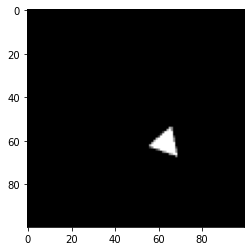

In [161]:
data_direc = 'geometric shapes dataset'
classes = []
#Obtain the name of the class directories we will work with
for i in os.listdir(data_direc):
    classes.append(i)

#read in images from separate class directories
data = []
class_labels = []
scale_factor = 0.5

label = 0
for i in classes:
    path = data_direc+'/'+str(i)
    images = os.listdir(path)
    for img in images:
        image = cv2.imread(path+'/'+img,0) #read in the image in greyscale to reduce computation time
        size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)) 
        image = cv2.resize(image, size, interpolation=cv2.INTER_AREA) #resize using aspect ratio
        image = np.array(image)
        data.append(image) #add image to dataset
        class_labels.append(label) #add associated integer label to class_labels list
    label = label + 1

plt.imshow(data[29999], cmap='gray')
print(data[29999].shape)

## 3. Split data into training and testing

In [162]:
#Convert images and labels to numpy arrays
training_images = np.array(data)
training_labels = np.array(class_labels)

#Convert labels into One-Hot Encoded labels
training_labels = to_categorical(training_labels, num_classes = 3)

#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels,   
                                                    test_size = 0.25, random_state = 42, shuffle=True)

#Regularize images to ease computation
x_train = x_train/255
x_test = x_test/255

#Reshape, adding a channels dimension
x_train = x_train.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

#Verify dimensions of training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 100, 100, 1)
(7500, 100, 100, 1)
(22500, 3)
(7500, 3)


## 4. Data Augmentation to prevent overfitting

In [163]:
#add data augmentation to prevent overfitting

## 5. Convolutional Neural Network Setup

In [164]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu", input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))

#ADD SOMETHING TO DEAL WITH LEARNING RATE

#fully connected neural network
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

## 6. Compile and fit the model

In [165]:
#compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#fit the model on the training and testing sets
history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_test, y_test))

Epoch 1/20
176/176 [==============================] - 33s 183ms/step - loss: 1.0110 - accuracy: 0.4636 - val_loss: 0.9177 - val_accuracy: 0.5667
Epoch 2/20
176/176 [==============================] - 32s 180ms/step - loss: 0.8202 - accuracy: 0.6135 - val_loss: 0.6973 - val_accuracy: 0.6940
Epoch 3/20
176/176 [==============================] - 33s 188ms/step - loss: 0.6140 - accuracy: 0.7276 - val_loss: 0.5579 - val_accuracy: 0.7495
Epoch 4/20
176/176 [==============================] - 33s 187ms/step - loss: 0.4796 - accuracy: 0.7960 - val_loss: 0.4413 - val_accuracy: 0.8167
Epoch 5/20
176/176 [==============================] - 34s 191ms/step - loss: 0.3831 - accuracy: 0.8470 - val_loss: 0.3729 - val_accuracy: 0.8548
Epoch 6/20
176/176 [==============================] - 37s 209ms/step - loss: 0.3184 - accuracy: 0.8755 - val_loss: 0.3282 - val_accuracy: 0.8652
Epoch 7/20
176/176 [==============================] - 33s 188ms/step - loss: 0.2688 - accuracy: 0.8937 - val_loss: 0.3031 - val_ac

## 7. Evaluate training loss vs validation loss

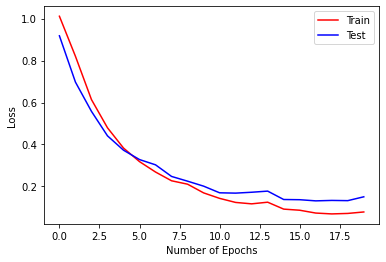

In [166]:
#check the loss
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

## 8. Evaluate training accuracy vs validation accuracy

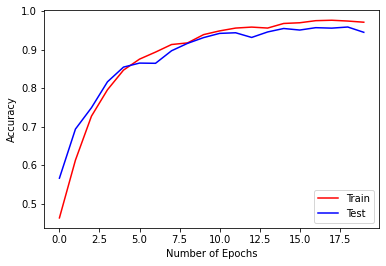

In [167]:
#check the accuracy
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

## 9. Display Accuracy of Model

In [168]:
model_accuracy = model.evaluate(x_test,y_test)
print("accuracy of model: ", model_accuracy[1])

235/235 [==============================] - 3s 12ms/step - loss: 0.1508 - accuracy: 0.9451
accuracy of model:  0.9450666904449463
